# Corona Virus In The World

In [1]:
#Importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

### Our Main 3 Datasets - https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [2]:
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_global.csv')

confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
deaths_reported = pd.read_csv('time_series_covid19_deaths_global.csv')

deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
recovered_cases = pd.read_csv('time_series_covid19_recovered_global.csv')

recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,282,309,333,344,344,344,385,398,423,468
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,5,5,5,5,5,5,5,5
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Extracting all the colums using the .keys() function

cols = confirmed_cases.keys()

cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [6]:
#Extracting only the dates columns that have information of confirmed, deaths and recovered cases

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [7]:
#Finding the total confirmed cases, deaths and recovered cases and append them to 4 empty lists
#Also calculate the total mortality rate which is the death-sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [8]:
confirmed_sum

3256846

In [9]:
death_sum

233388

In [10]:
recovered_sum

1014753

In [11]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145219,
 156116,
 167466,
 181603,
 197113,
 214846,
 242616,
 272247,
 304555,
 337018,
 378282,
 418079,
 467723,
 529701,
 593423,
 660824,
 720285,
 782490,
 857608,
 932638,
 1013458,
 1095876,
 1176059,
 1249737,
 1321427,
 1396438,
 1480200,
 1565538,
 1657929,
 1736025,
 1835164,
 1905192,
 1975581,
 2055506,
 2151872,
 2239723,
 2317339,
 2400843,
 2471759,
 2548821,
 2624107,
 2707742,
 2794829,
 2879770,
 2953368,
 3021807,
 3095043,
 3169904,
 3256846]

In [12]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [13]:
#Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [14]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4614],
       [  4722],
       [  5408],
       [  5830],
       [  6472],
       [  7150],
       [  7956],
       [  8823],
       [  9946],
       [ 11422

In [15]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58358],
       [  60694],
       [  62494],
       [  64404],
       [  67003],
       [  68324],
       [  70251],
       [  72624],
       [  76034],
       [  78088],
       [  

In [16]:
#Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[: -10]

In [17]:
#Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []

for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))

In [18]:
#For visualization with the latest data of the 30th of april

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [19]:
latest_confirmed

0      2171
1       773
2      4006
3       745
4        27
       ... 
261       6
262      14
263       6
264       1
265      15
Name: 4/30/20, Length: 266, dtype: int64

In [20]:
latest_deaths

0       64
1       31
2      450
3       42
4        2
      ... 
261      0
262      0
263      2
264      0
265      0
Name: 4/30/20, Length: 266, dtype: int64

In [21]:
latest_recoveries

0       260
1       470
2      1779
3       468
4         7
       ... 
247       5
248       4
249       1
250       0
251       0
Name: 4/30/20, Length: 252, dtype: int64

In [22]:
#Find the list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())

unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [23]:
#Calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []

for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region'] == i].sum()
    
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries=[k for k, v in sorted(zip(unique_countries, country_confirmed_cases) ,key=operator.itemgetter(1),reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region'] == unique_countries[i]].sum()

In [24]:
#Number of cases per country/region

print('Confirmed cases by Countries/Regions:')

for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by Countries/Regions:
US: 1069424 cases
Spain: 213435 cases
Italy: 205463 cases
United Kingdom: 172481 cases
France: 167299 cases
Germany: 163009 cases
Turkey: 120204 cases
Russia: 106498 cases
Iran: 94640 cases
Brazil: 87187 cases
China: 83956 cases
Canada: 54457 cases
Belgium: 48519 cases
Netherlands: 39512 cases
Peru: 36976 cases
India: 34863 cases
Switzerland: 29586 cases
Portugal: 25045 cases
Ecuador: 24934 cases
Saudi Arabia: 22753 cases
Sweden: 21092 cases
Ireland: 20612 cases
Mexico: 19224 cases
Pakistan: 16817 cases
Singapore: 16169 cases
Chile: 16023 cases
Israel: 15946 cases
Austria: 15452 cases
Japan: 14088 cases
Belarus: 14027 cases
Qatar: 13409 cases
Poland: 12877 cases
United Arab Emirates: 12481 cases
Romania: 12240 cases
Korea, South: 10774 cases
Ukraine: 10406 cases
Indonesia: 10118 cases
Denmark: 9356 cases
Serbia: 9009 cases
Philippines: 8488 cases
Norway: 7738 cases
Czechia: 7682 cases
Bangladesh: 7667 cases
Dominican Republic: 6972 cases
Australia:

In [25]:
#Find the list of unique provinces

unique_provinces = list(confirmed_cases['Province/State'].unique())

In [26]:
#Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []

for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State'] == i].sum()
    
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [27]:
#Number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 106 cases
New South Wales: 3025 cases
Northern Territory: 28 cases
Queensland: 1033 cases
South Australia: 438 cases
Tasmania: 221 cases
Victoria: 1364 cases
Western Australia: 551 cases
Alberta: 5355 cases
British Columbia: 2112 cases
Grand Princess: 13 cases
Manitoba: 277 cases
New Brunswick: 118 cases
Newfoundland and Labrador: 258 cases
Nova Scotia: 947 cases
Ontario: 17395 cases
Prince Edward Island: 27 cases
Quebec: 27550 cases
Saskatchewan: 389 cases
Anhui: 991 cases
Beijing: 593 cases
Chongqing: 579 cases
Fujian: 356 cases
Gansu: 139 cases
Guangdong: 1588 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 168 cases
Hebei: 328 cases
Heilongjiang: 944 cases
Henan: 1276 cases
Hong Kong: 1037 cases
Hubei: 68128 cases
Hunan: 1019 cases
Inner Mongolia: 201 cases
Jiangsu: 653 cases
Jiangxi: 937 cases
Jilin: 111 cases
Liaoning: 146 cases
Macau: 45 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 306 cases
Shandong: 787 cases
Shanghai: 652 cases
Shanxi: 

In [28]:
#Handling nan values

nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

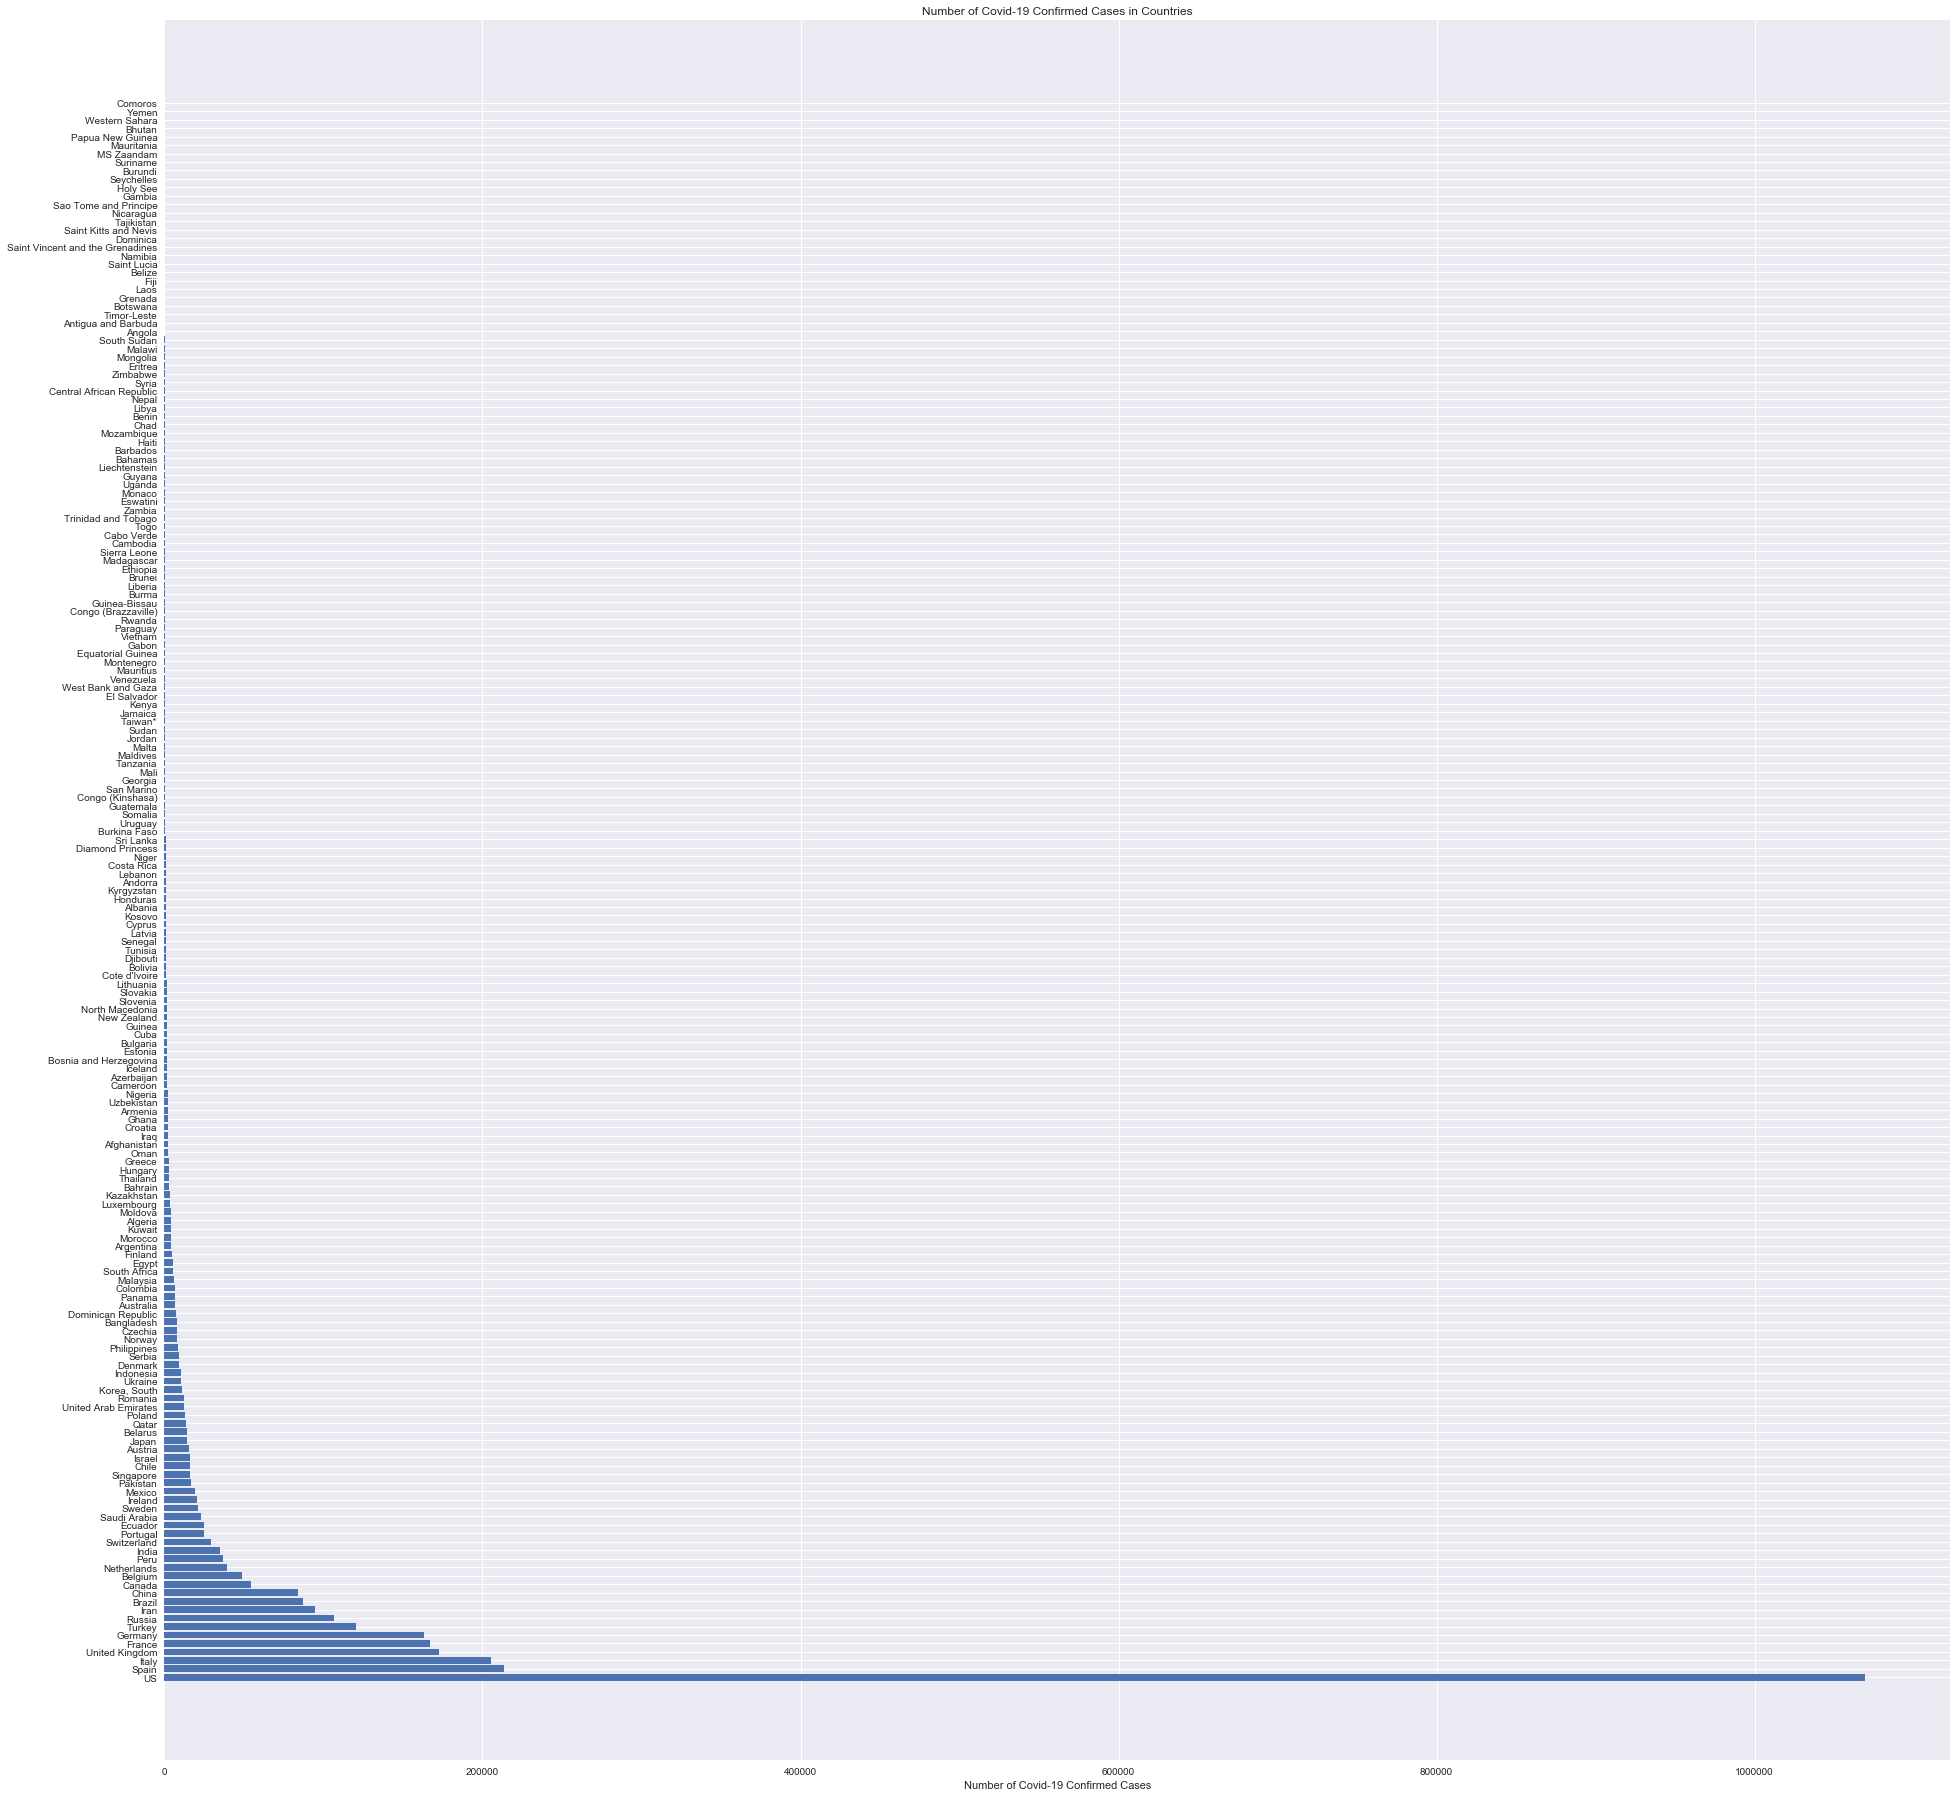

In [29]:
#Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize = (32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

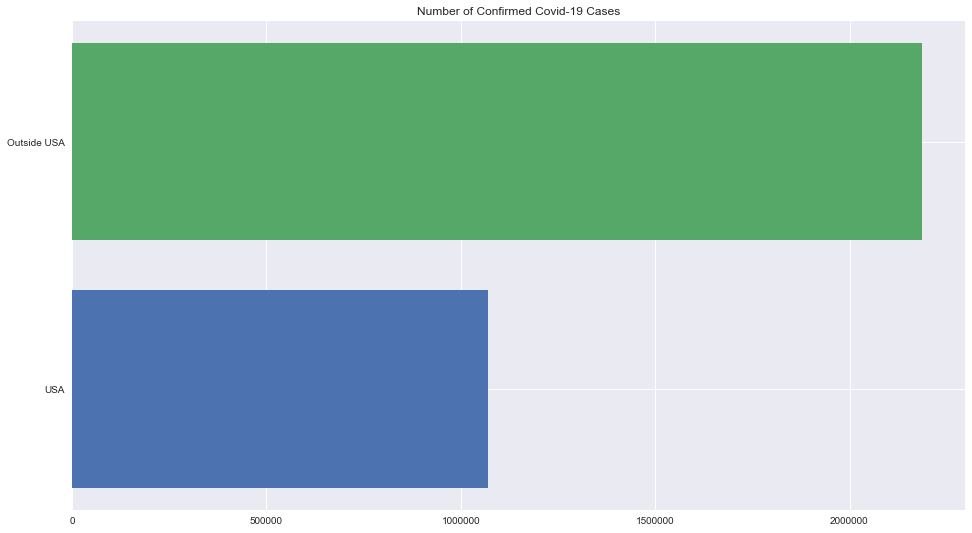

In [30]:
#Plot a bar graph to see the total confirmed cases between USA and outside of the USA

USA_confirmed = latest_confirmed[confirmed_cases['Country/Region'] == 'US'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize = (16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Confirmed Covid-19 Cases')
plt.show()

In [31]:
#Print the total cases in USA and outside of it

print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed + outside_USA_confirmed))

Outside USA 2187422 cases:
USA: 1069424 cases
Total: 3256846 cases


In [32]:
#Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

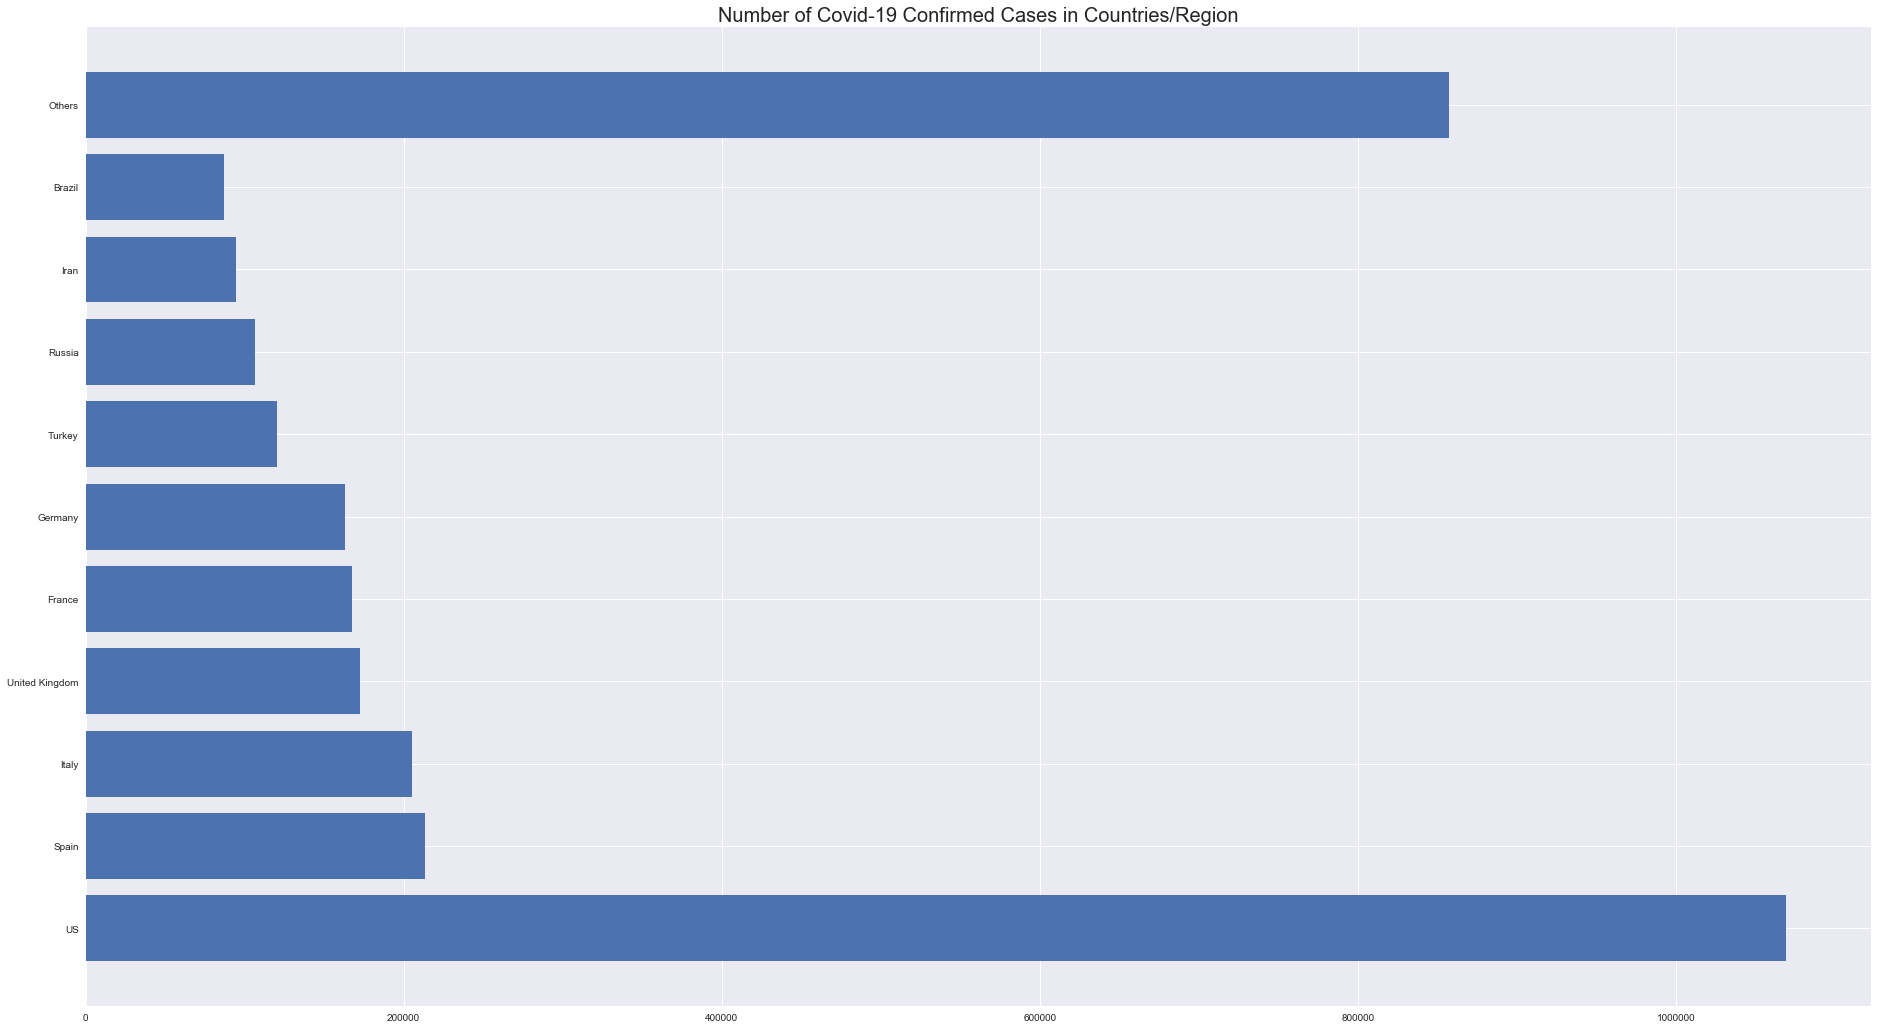

In [33]:
#Visualize the 10 countries

plt.figure(figsize = (32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Region', size = 20)
plt.show()

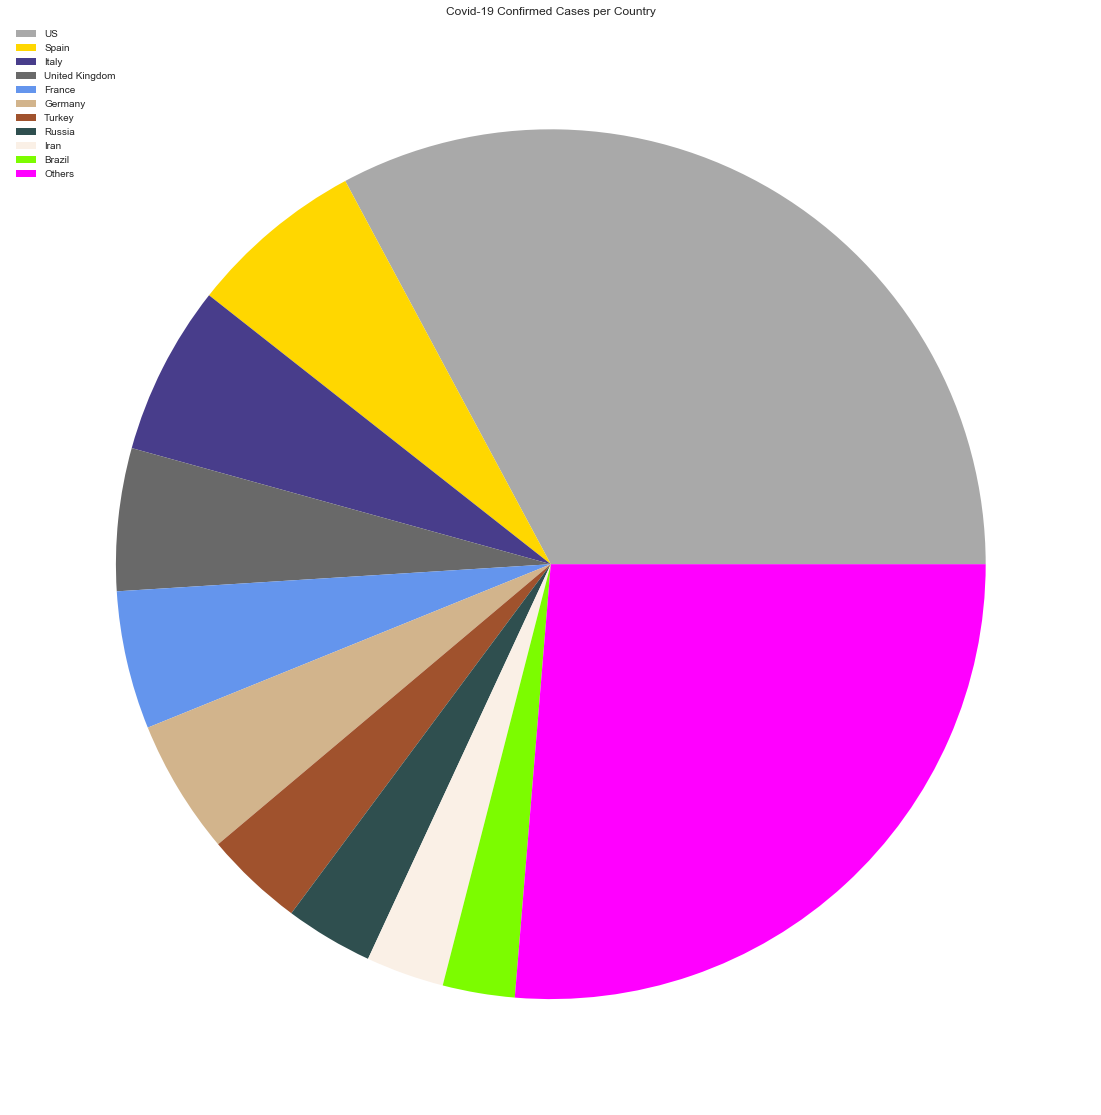

In [34]:
#Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize = (20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors = c)
plt.legend(visual_unique_countries, loc = 'best')
plt.show()

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 <a list of 9 Text yticklabel objects>)

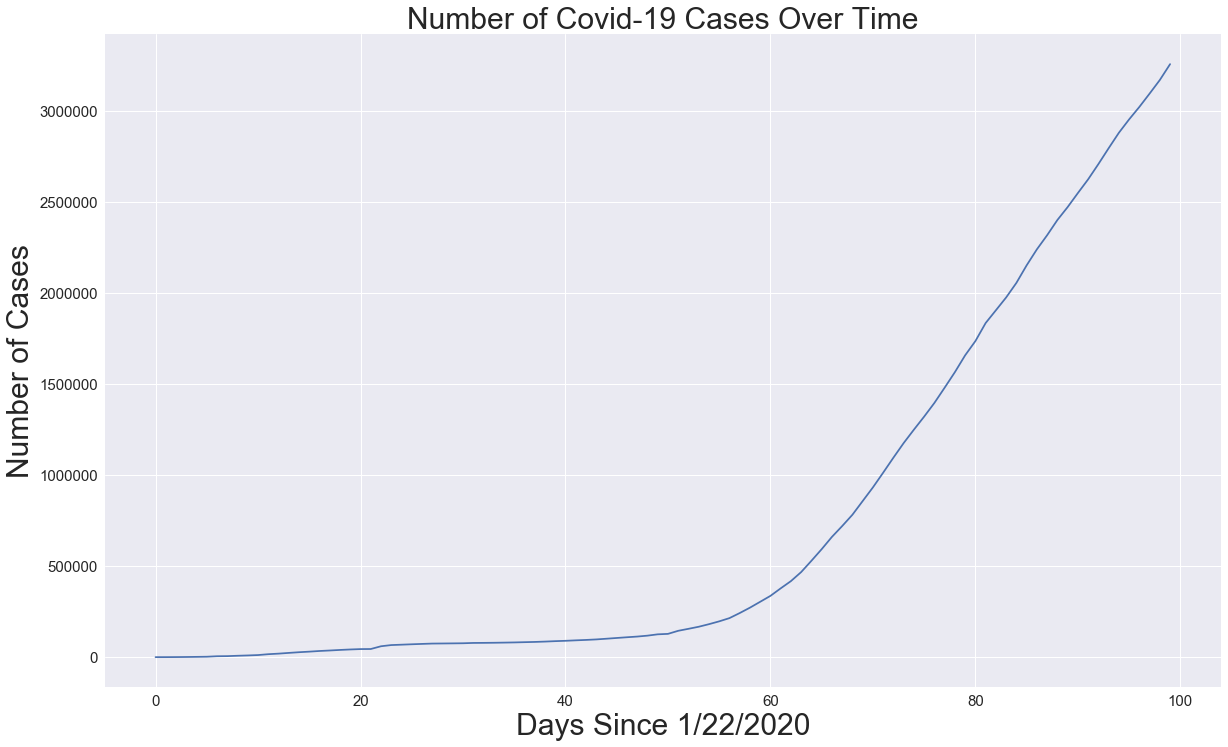

In [35]:
#Total number of corona virus cases over time

plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Covid-19 Cases Over Time', size = 30)
plt.xlabel('Days Since 1/22/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)

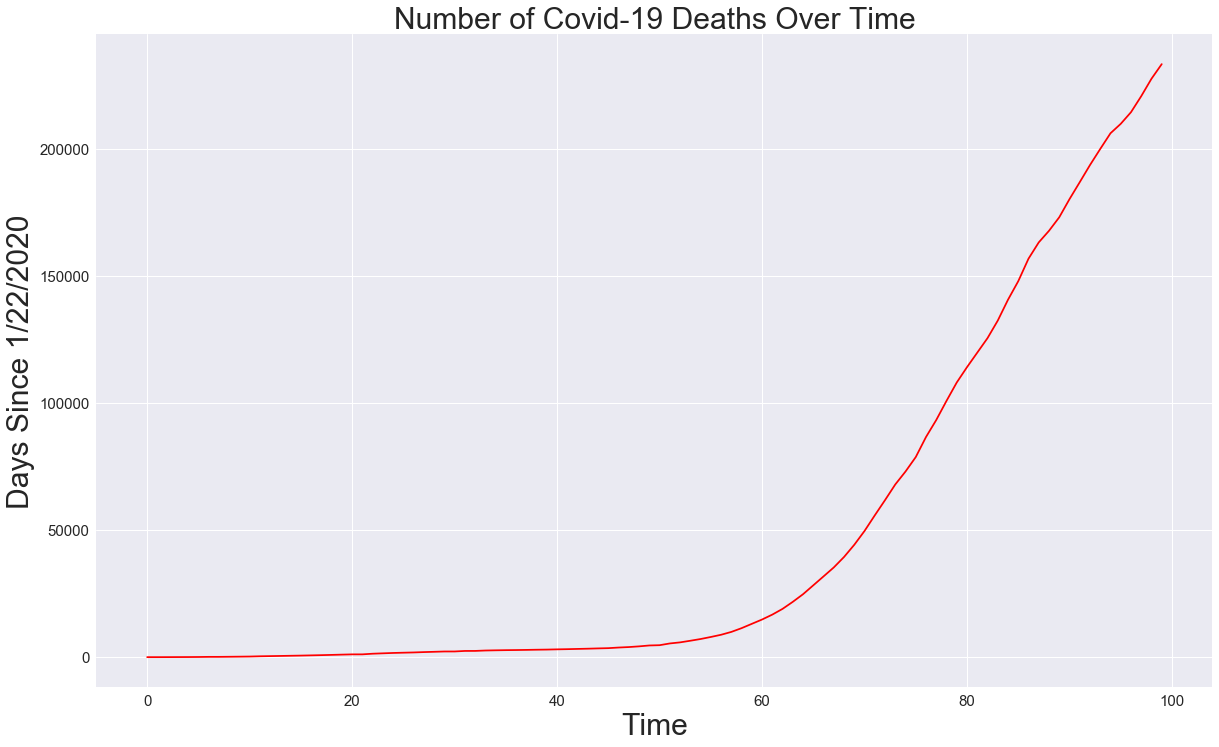

In [36]:
plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, total_deaths, color = 'red')
plt.title('Number of Covid-19 Deaths Over Time', size = 30)
plt.xlabel('Time', size = 30)
plt.ylabel('Days Since 1/22/2020', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

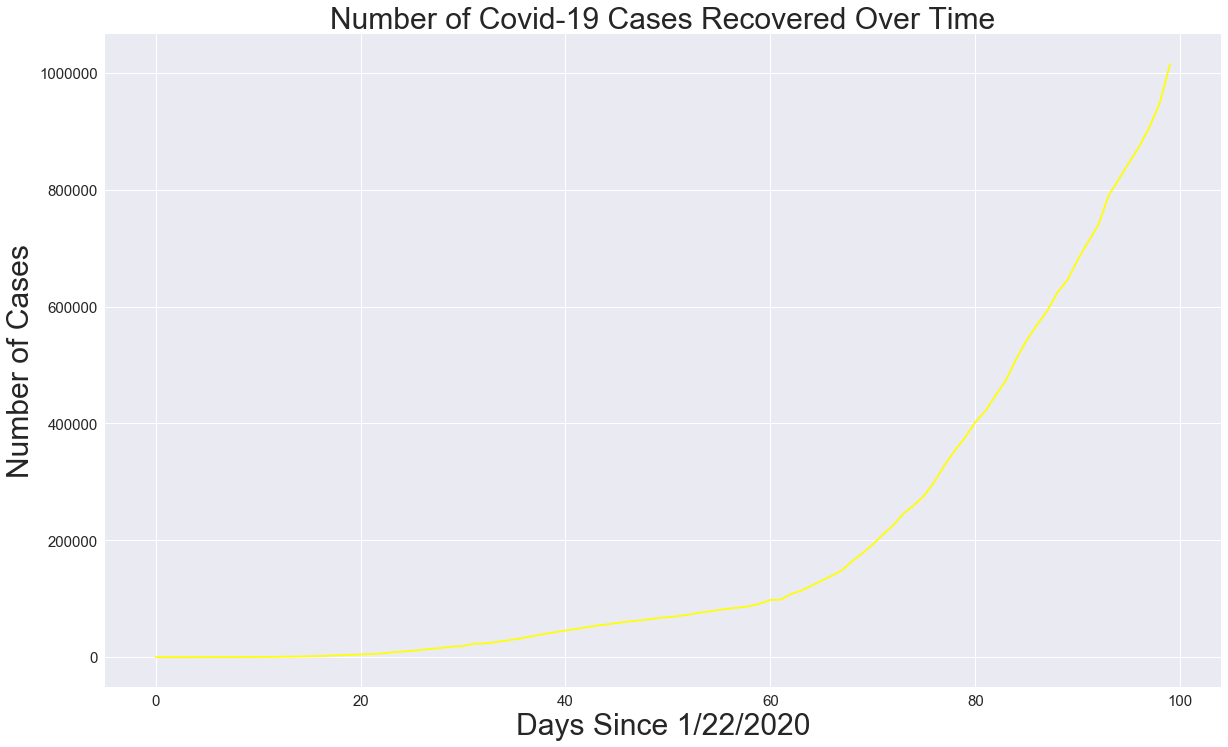

In [37]:
#Corona Virus Cases Recovered Over Time

plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, total_recovered, color = 'yellow')
plt.title('Number of Covid-19 Cases Recovered Over Time', size = 30)
plt.xlabel('Days Since 1/22/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

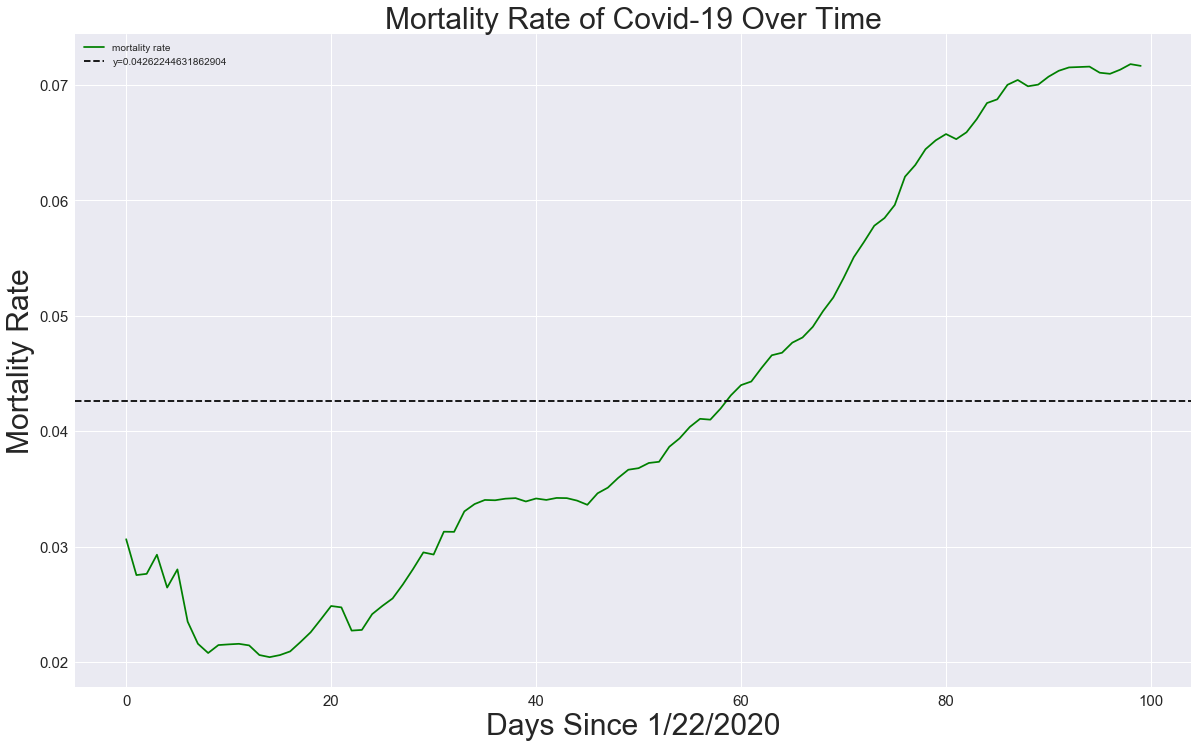

In [38]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, mortality_rate, color = 'green')
plt.axhline(y = mean_mortality_rate, linestyle = '--', color = 'black')
plt.title('Mortality Rate of Covid-19 Over Time', size = 30)
plt.xlabel('Days Since 1/22/2020', size = 30)
plt.ylabel('Mortality Rate', size = 30)
plt.legend(['mortality rate', 'y=' + str(mean_mortality_rate)])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

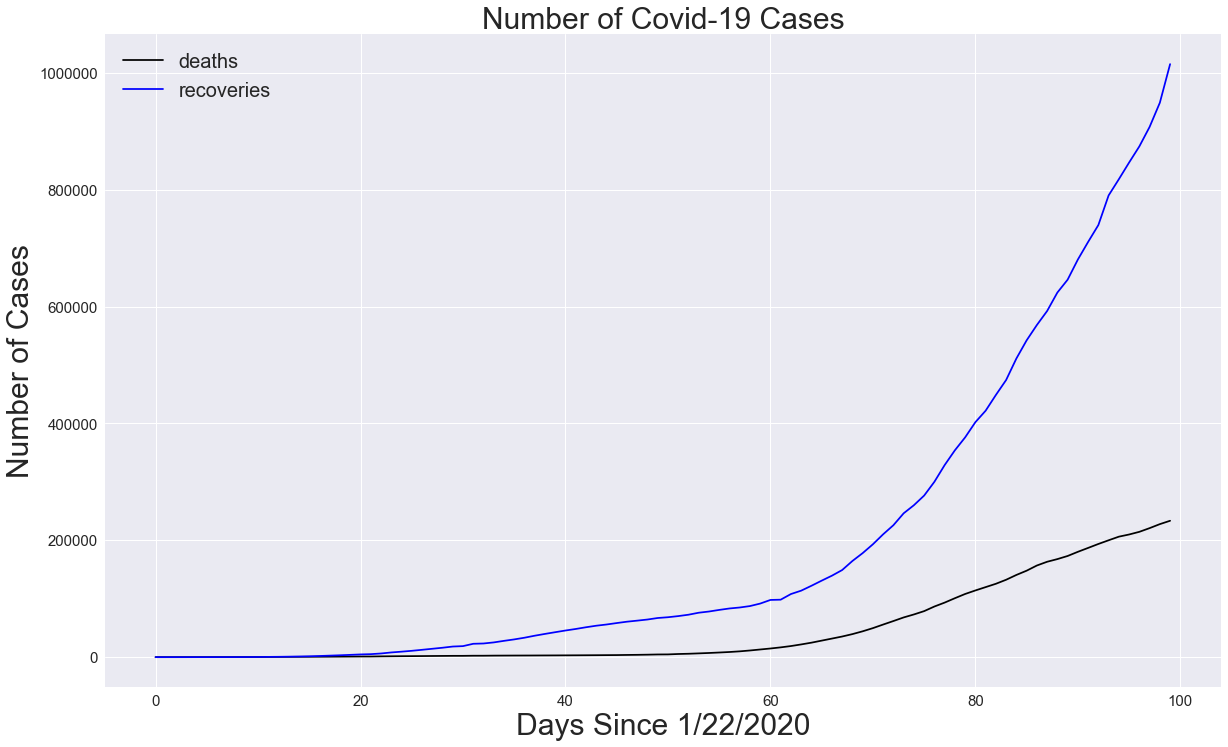

In [39]:
#Number of Corona Virus vases recovered vs the number of deaths

plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, total_deaths, color = 'black')
plt.plot(adjusted_dates, total_recovered, color = 'blue')
plt.title('Number of Covid-19 Cases', size = 30)
plt.xlabel('Days Since 1/22/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.legend(['deaths', 'recoveries'], loc = 'best', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

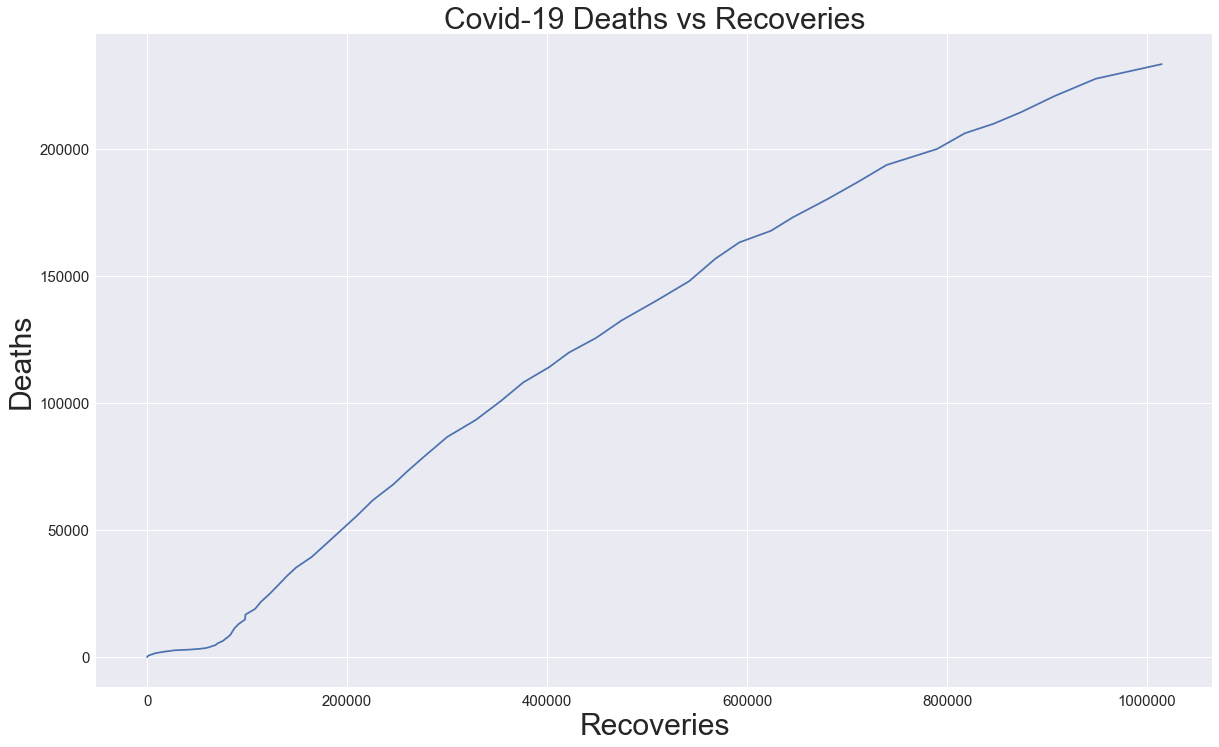

In [40]:
#Corona Virus Deaths vs Recoveries

plt.figure(figsize = (20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Covid-19 Deaths vs Recoveries', size = 30)
plt.xlabel('Recoveries', size = 30)
plt.ylabel('Deaths', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [41]:
#Building the SVM model

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1 ,10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   29.2s finished
C:\Users\Fivos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [42]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 10}

In [43]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [44]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
svm_pred

array([1.96244694e+03, 1.96487590e+03, 1.98187858e+03, 2.02802872e+03,
       2.11790004e+03, 2.26606627e+03, 2.48710114e+03, 2.79557838e+03,
       3.20607172e+03, 3.73315487e+03, 4.39140158e+03, 5.19538556e+03,
       6.15968056e+03, 7.29886027e+03, 8.62749847e+03, 1.01601688e+04,
       1.19114451e+04, 1.38959011e+04, 1.61281104e+04, 1.86226468e+04,
       2.13940840e+04, 2.44569958e+04, 2.78259559e+04, 3.15155380e+04,
       3.55403158e+04, 3.99148632e+04, 4.46537536e+04, 4.97715611e+04,
       5.52828592e+04, 6.12022216e+04, 6.75442221e+04, 7.43234345e+04,
       8.15544325e+04, 8.92517897e+04, 9.74300800e+04, 1.06103877e+05,
       1.15287755e+05, 1.24996286e+05, 1.35244046e+05, 1.46045607e+05,
       1.57415544e+05, 1.69368429e+05, 1.81918838e+05, 1.95081343e+05,
       2.08870519e+05, 2.23300938e+05, 2.38387175e+05, 2.54143804e+05,
       2.70585398e+05, 2.87726531e+05, 3.05581777e+05, 3.24165709e+05,
       3.43492900e+05, 3.63577926e+05, 3.84435360e+05, 4.06079775e+05,
      

MAE: 803043.9504527025
MSE: 650307623614.5168


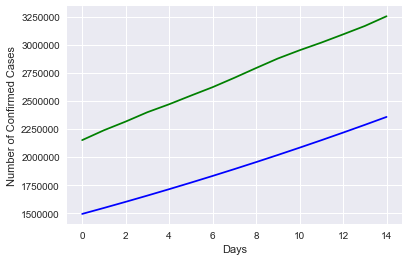

In [46]:
#Ckeck against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, color = 'blue')
plt.plot(y_test_confirmed, color = 'green')
plt.xlabel('Days')
plt.ylabel('Number of Confirmed Cases')
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))

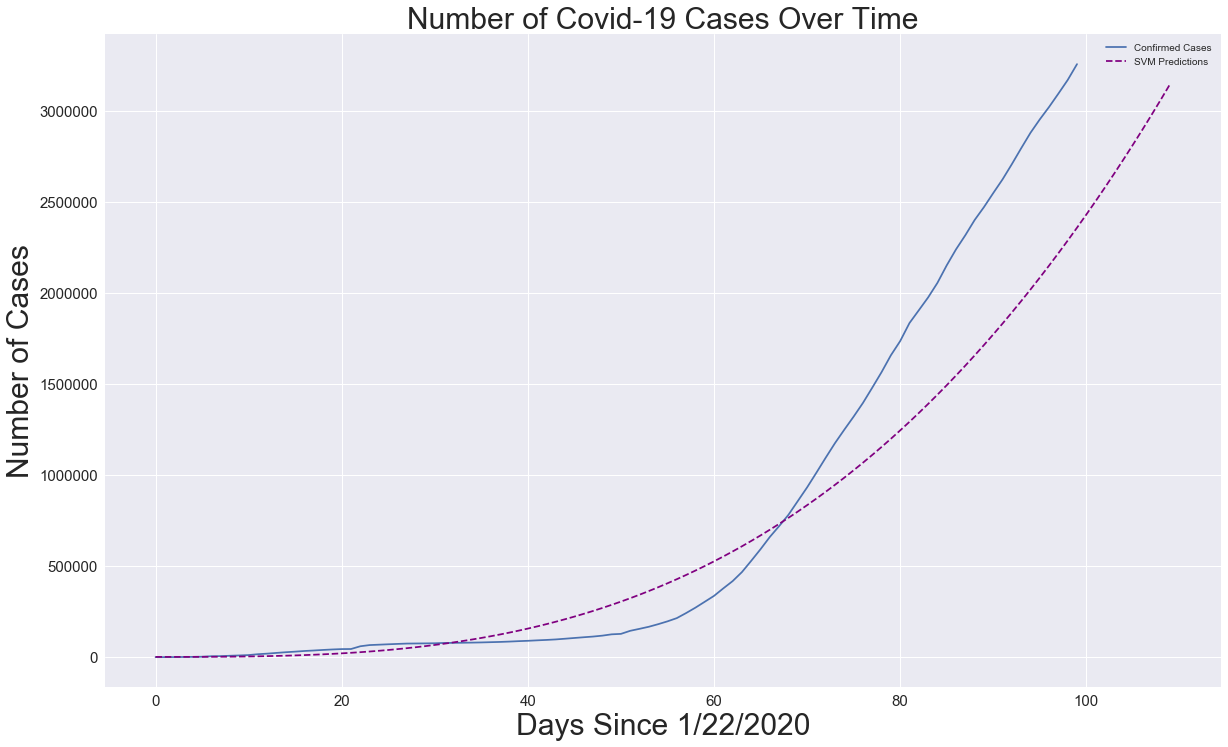

In [47]:
#Confirmed vs Predicted cases

plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle = 'dashed', color = 'purple')
plt.title('Number of Covid-19 Cases Over Time', size = 30)
plt.xlabel('Days Since 1/22/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.legend(['Confirmed Cases', 'SVM Predictions'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [48]:
#Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('05/01/2020', 2430917.0875681313),
 ('05/02/2020', 2504516.8375681313),
 ('05/03/2020', 2579588.5406931313),
 ('05/04/2020', 2656146.7594431313),
 ('05/05/2020', 2734206.0719431313),
 ('05/06/2020', 2813781.0563181313),
 ('05/07/2020', 2894886.2828806313),
 ('05/08/2020', 2977536.3219431313),
 ('05/09/2020', 3061745.7516306313),
 ('05/10/2020', 3147529.1422556313)}

In [49]:
#Using Linear Regression model to make predictions

linear_model = LinearRegression(normalize = True, fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1398193.5575923386
MSE: 2022186321883.8337


Text(0, 0.5, 'Number of Confirmed Cases')

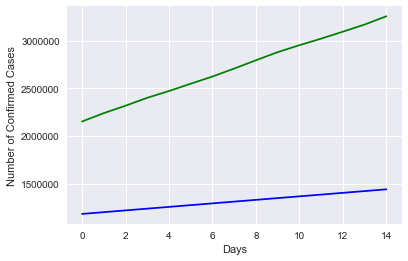

In [50]:
plt.plot(test_linear_pred, color = 'blue')
plt.plot(y_test_confirmed, color = 'green')
plt.xlabel('Days')
plt.ylabel('Number of Confirmed Cases')

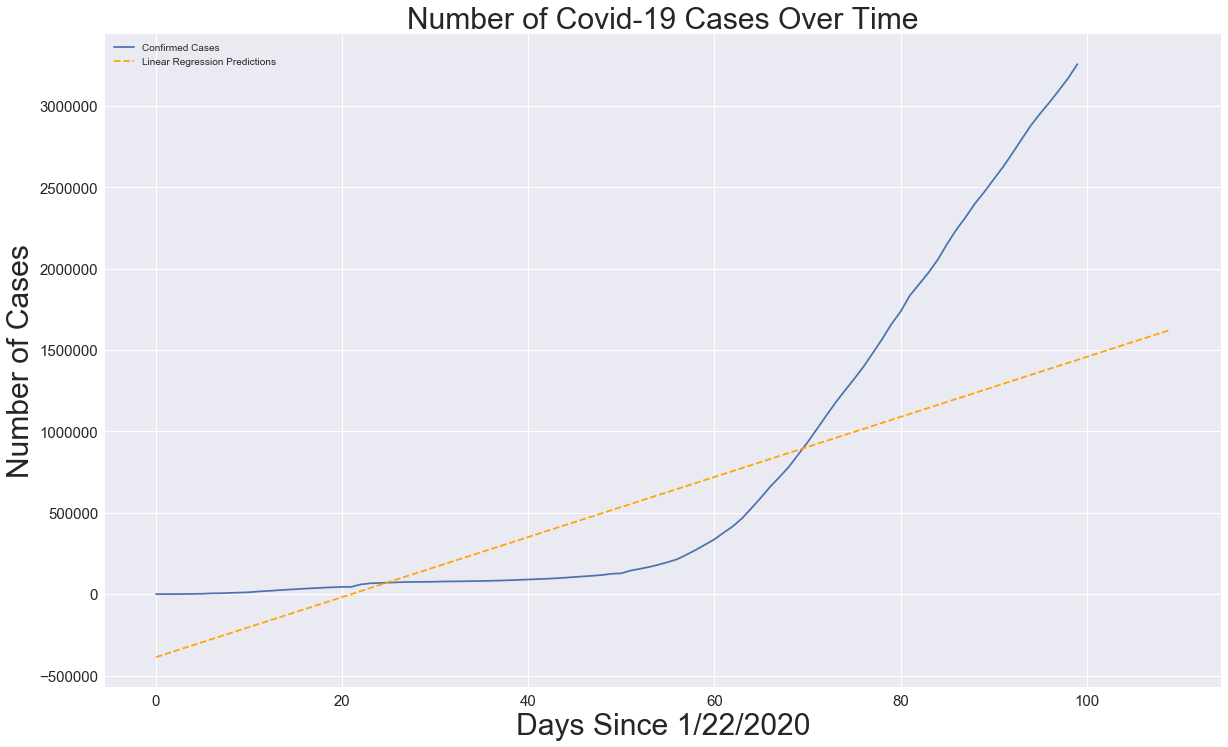

In [51]:
plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle = 'dashed', color = 'orange')
plt.title('Number of Covid-19 Cases Over Time', size = 30)
plt.xlabel('Days Since 1/22/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [52]:
#Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[1458317.80683995]
 [1476766.95239398]
 [1495216.09794802]
 [1513665.24350205]
 [1532114.38905609]
 [1550563.53461012]
 [1569012.68016416]
 [1587461.82571819]
 [1605910.97127223]
 [1624360.11682627]]
